In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.gaussian_process import GaussianProcess
import GCL as gcl
import NOJ as noj
import WindTurbine as wt
import WindFarm as wf
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

In [2]:
D=np.float64(50.)
R=D/2.
CT=np.float64(0.05)
TI=np.float64(0.07)
x=np.float64(50.)
r=np.float64(20.)
x_a = D*np.linspace(-2.,20.,100)
r_a = 0.*np.linspace(0.,40.,100)

###Wake radius

In [3]:
rw, xt_st, c1 = gcl.get_rw(x=x_a,d=D,ti=TI,ct=CT)
rw_noj = noj.get_rw(x=x_a,d=D,ct=CT)
rw_noj_kj_0p075 = noj.get_rw(x=x_a,d=D,ct=CT,kj=0.075)
rw_noj_kj_0p09 = noj.get_rw(x=x_a,d=D,ct=CT,kj=0.09)

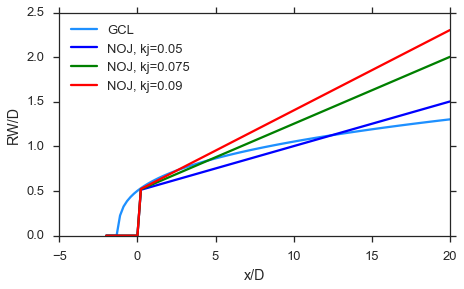

In [4]:
fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)
ax.plot(x_a/D,rw/D,'-',color='dodgerblue',label='GCL')
ax.plot(x_a/D,rw_noj/D,'-b',label='NOJ, kj=0.05')
ax.plot(x_a/D,rw_noj_kj_0p075/D,'-g',label='NOJ, kj=0.075')
ax.plot(x_a/D,rw_noj_kj_0p09/D,'-r',label='NOJ, kj=0.09')
ax.set_xlabel('x/D')
ax.set_ylabel('RW/D')
ax.legend(loc='upper left')

###Wake deficit

In [5]:
x=D*np.linspace(-2.,70.,100)
y=0.*np.linspace(-1.,1.,100)+10.0
z=np.zeros_like(x)
DT=D*np.ones_like(x)

In [6]:
dueq = gcl.get_dueq(x=x,y=y,z=z,dt=DT,d=D,ct=CT,ti=TI)
du_noj = noj.get_dueq(x=x,y=y,z=z,dt=DT,d=D,ct=CT)
du_noj_kj_0p075 = noj.get_dueq(x=x,y=y,z=z,dt=DT,d=D,ct=CT,kj=0.075)
du_noj_kj_0p09 = noj.get_dueq(x=x,y=y,z=z,dt=DT,d=D,ct=CT,kj=0.09)

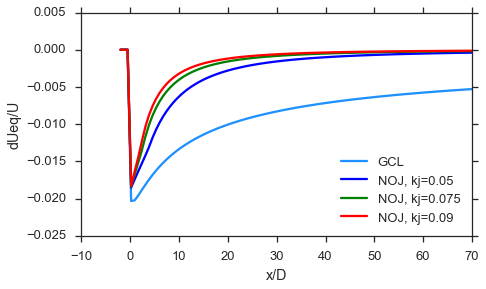

In [7]:
fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)
ax.plot(x/D,dueq,'-',color='dodgerblue',label='GCL')
ax.plot(x/D,du_noj,'-b',label='NOJ, kj=0.05')
ax.plot(x/D,du_noj_kj_0p075,'-g',label='NOJ, kj=0.075')
ax.plot(x/D,du_noj_kj_0p09,'-r',label='NOJ, kj=0.09')
ax.set_xlabel('x/D')
ax.set_ylabel('dUeq/U')
ax.legend(loc='lower right')

### Power production

No annotation of turbines


(<matplotlib.figure.Figure at 0x104cf8110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109fa33d0>)

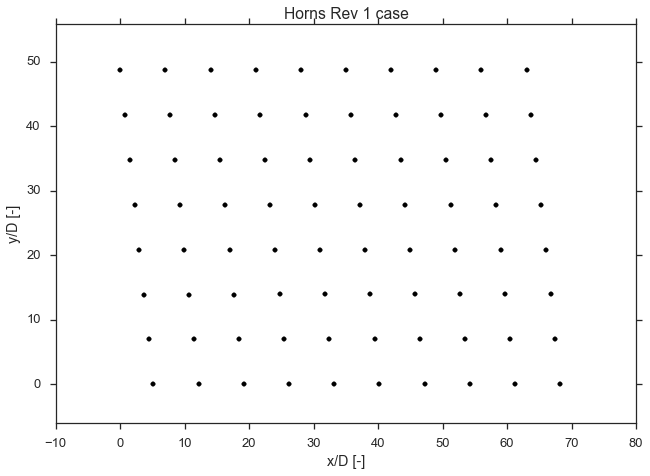

In [8]:
v80 = wt.WindTurbine('V80 2MW offshore','V80_2MW_offshore.dat',70,40)
HR1 = wf.WindFarm('Horns Rev 1 case','HR_coordinates.dat',v80)
#HR1 = wf.WindFarm('Horns Rev 1 case','HR_row_7_6_8_coordinates.dat',v80)
HR1.plot()

In [9]:
from scipy.interpolate import pchip_interpolate as interp

In [10]:
c2c_vec = HR1.vectWTtoWT
x_g = c2c_vec[0,:,:]
y_g = c2c_vec[1,:,:]
z_g = np.zeros([HR1.nWT,HR1.nWT])
dt = (HR1.WT.R*2.)*np.ones([HR1.nWT])
nu = 100#22
u_c = np.linspace(v80.u_cutin,v80.u_cutout,nu)
p_c = np.array([[[u_c[i],interp(v80.ref_u,v80.ref_P,u_c[i])] for i in range(nu)] \
      for j in range(HR1.nWT)])
ct_c = np.array([[[u_c[i],interp(v80.ref_u,v80.ref_CT,u_c[i])] for i in range(nu)]\
      for j in range(HR1.nWT)])
ws = 8.0
ti = 0.07

ct = gcl.interp_l(ct_c[0,:,0],ct_c[0,:,1],ws)
rw, x_st, c1 = gcl.get_rw(x=x_g[0,:],d=dt[0],ti=ti,ct=ct)

print 'x_g/D'
print x_g[0,:]/dt
print 'y_g/D'
print y_g[0,:]/dt
print 'rw/D'
print rw/dt

x_g/D
[  0.       0.7375   1.475    2.2125   2.95     3.675    4.4125   5.15     7.
   7.7375   8.475    9.2125   9.95    10.6875  11.425   12.1625  14.
  14.7375  15.475   16.2125  16.95    17.6875  18.425   19.1625  21.
  21.7375  22.475   23.2125  23.95    24.7     25.4375  26.175   28.
  28.7375  29.475   30.225   30.9625  31.7     32.4375  33.175   35.
  35.7375  36.475   37.225   37.9625  38.7     39.4375  40.1875  42.
  42.7375  43.4875  44.225   44.9625  45.7125  46.45    47.1875  49.
  49.7375  50.4875  51.225   51.975   52.7125  53.45    54.2     56.
  56.7375  57.4875  58.225   58.975   59.7125  60.4625  61.2     63.      63.75
  64.4875  65.2375  65.975   66.725   67.4625  68.2125]
y_g/D
[  0.      -6.975  -13.9375 -20.9125 -27.8875 -34.8625 -41.825  -48.8      0.
  -6.975  -13.9375 -20.9125 -27.8875 -34.8625 -41.825  -48.8      0.
  -6.975  -13.9375 -20.9125 -27.8875 -34.8625 -41.825  -48.8      0.
  -6.975  -13.9375 -20.9125 -27.8875 -34.85   -41.825  -48.8      0.
  -6.9

In [11]:
wd=270.
p,t,u = gcl.gcl_s(x_g,y_g,z_g,dt,p_c,ct_c,ws,wd,ti)
p_noj,t_noj,u_noj = noj.noj_s(x_g,y_g,z_g,dt,p_c,ct_c,ws,wd)
p_noj_ti,t_noj_ti,u_noj_ti = noj.noj_s(x_g,y_g,z_g,dt,p_c,ct_c,ws,wd,kj=ti/2.5)

In [12]:
p,t,u = p[range(6,80,8)],t[range(6,80,8)],u[range(6,80,8)] 
p_noj,t_noj,u_noj = p_noj[range(6,80,8)],t_noj[range(6,80,8)],u_noj[range(6,80,8)] 
p_noj_ti,t_noj_ti,u_noj_ti = p_noj_ti[range(6,80,8)],t_noj_ti[range(6,80,8)],u_noj_ti[range(6,80,8)] 
#p,t,u = p[0:9],t[0:9],u[0:9] 
#p_noj,t_noj,u_noj = p_noj[0:9],t_noj[0:9],u_noj[0:9] 

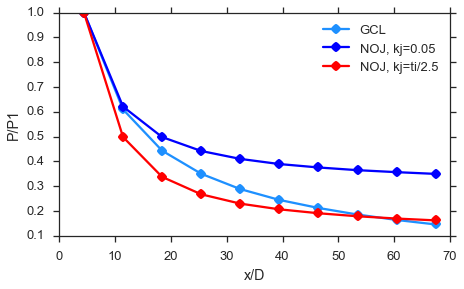

In [13]:
fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)
#ax.plot(x_g[0,0:9]/dt[0:9],p/p[0],'o-',color='dodgerblue',label='GCL')
#ax.plot(x_g[0,0:9]/dt[0:9],p_noj/p[0],'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],p/p[0],'o-',color='dodgerblue',label='GCL')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],p_noj/p[0],'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],p_noj_ti/p[0],'o-r',label='NOJ, kj=ti/2.5')
ax.set_xlabel('x/D')
ax.set_ylabel('P/P1')
ax.legend(loc='upper right')

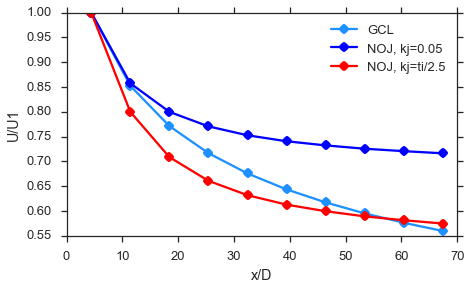

In [14]:
fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)
#ax.plot(x_g[0,0:9]/dt[0:9],u/u[0],'o-',color='dodgerblue',label='GCL')
#ax.plot(x_g[0,0:9]/dt[0:9],u_noj/u[0],'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],u/u[0],'o-',color='dodgerblue',label='GCL')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],u_noj/u[0],'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],u_noj_ti/u[0],'o-r',label='NOJ, kj=ti/2.5')
ax.set_xlabel('x/D')
ax.set_ylabel('U/U1')
ax.legend(loc='upper right')

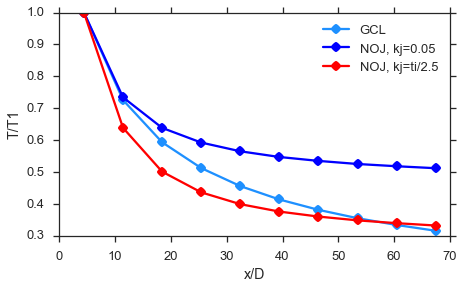

In [15]:
fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)
#ax.plot(x_g[0,0:9]/dt[0:9],t/t[0],'o-',color='dodgerblue',label='GCL')
#ax.plot(x_g[0,0:9]/dt[0:9],t_noj/t[0],'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],t/t[0],'o-',color='dodgerblue',label='GCL')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],t_noj/t[0],'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],t_noj_ti/t[0],'o-r',label='NOJ, kj=ti/2.5')
ax.set_xlabel('x/D')
ax.set_ylabel('T/T1')
ax.legend(loc='upper right')

### Uncertainty in single flow

In [17]:
WD_window = 15.#

In [21]:
df_pows = pd.DataFrame.from_csv('df_pows_complete.csv')
df_pows_filtered = df_pows[(df_pows.np07_corr>270.-WD_window)&(df_pows.np07_corr<270.+WD_window)\
       &(df_pows.ws_pow>7.5)&(df_pows.ws_pow<8.5)][np.append(range(6,80,8),[80,81,82,83,84,85,86])]
df_pows_filtered[df_pows_filtered.loc[:,'pow07':'pow97']<110]=np.NaN
df_pows_filtered[df_pows_filtered.loc[:,'pow07':'pow97']>920]=np.NaN

for i_col in range(10):
    col = df_pows_filtered.columns[i_col]
    index = df_pows_filtered[col].index[df_pows_filtered[col].apply(np.isnan)]
    for i in index:
        #df_pows_filtered[df_pows_filtered.columns[range(i_col,10)]].ix[i]=np.NaN
        df_pows_filtered.set_value(i,df_pows_filtered.columns[range(i_col,10)],np.NaN)
df=pd.DataFrame.from_csv('df_full_met_masts.csv')
df_pows_filtered['TI']=df.TI/100
df_pows_filtered['alpha']=df.alpha
df_pows_filtered['M2_d60_std']=df.M2_d60_std
df_pows_filtered.head()

,pow07,pow17,pow27,pow37,pow47,pow57,pow67,pow77,pow87,pow97,P_WF,np,diff_np,ratio_pow,ratio_pow2,ws_pow,np07_corr,TI,alpha,M2_d60_std
time_date,,,,,,,,,,,,,,,,,,,,
2005-01-01 02:20:00,597.9,597.6,626.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32575.1,233.0,-12.3,0.999498,1.048862,7.615256,255.011758,0.0828,NaN,NaN
2005-01-18 07:10:00,601.4,508.3,551.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30887.1,239.6,-5.4,0.845195,1.085579,7.629708,261.611758,0.0839,NaN,NaN
2005-01-18 07:50:00,770.6,766.0,778.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36993.1,233.3,-5.7,0.994031,1.016188,8.267996,255.311758,0.1084,NaN,NaN
2005-01-18 10:50:00,733.1,694.1,718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40971.3,262.7,-10.7,0.946801,1.034433,8.135459,284.711758,0.1015,NaN,NaN
2005-01-18 12:10:00,736.9,658.1,621.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23195.7,234.4,-9.5,0.893066,0.944537,8.149082,256.411758,0.0956,NaN,NaN


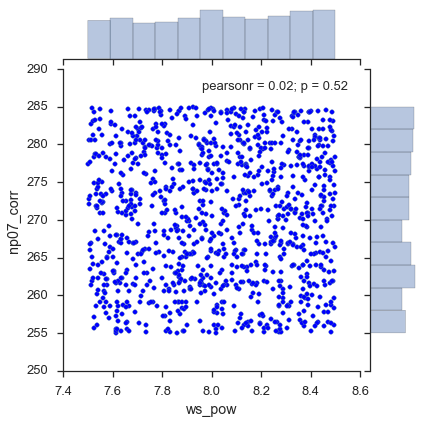

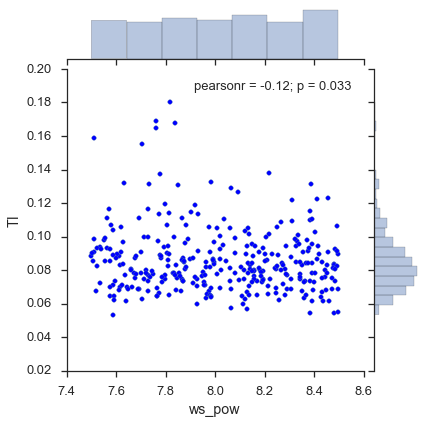

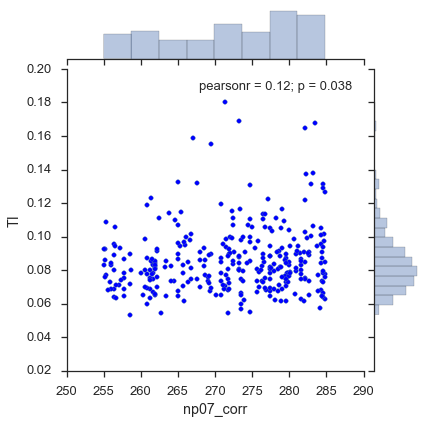

In [22]:
sns.jointplot(df_pows_filtered.ws_pow,df_pows_filtered.np07_corr)#,kind='kde')
fig=plt.gcf()
#fig.savefig('Figures/'+str(WD_window)+'/WS_vs_WD.pdf')

sns.jointplot(df_pows_filtered.ws_pow,df_pows_filtered.TI)#,kind='kde')
fig=plt.gcf()
#fig.savefig('Figures/'+str(WD_window)+'/WS_vs_TI.pdf')

sns.jointplot(df_pows_filtered.np07_corr,df_pows_filtered.TI)#,kind='kde')
fig=plt.gcf()
#fig.savefig('Figures/'+str(WD_window)+'/WD_vs_TI.pdf')

0.0857683076923


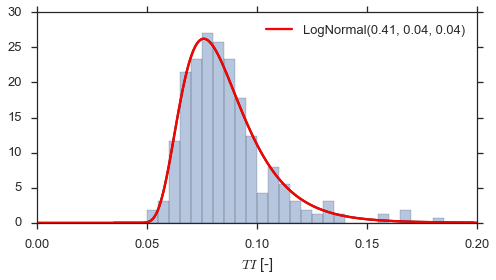

In [23]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
#sns.distplot(df_pows_filtered.alpha.dropna().values, bins=np.arange(0.025,0.35,0.05), 
#             kde=True, fit=sp.stats.lognorm)
#ax.set_xlabel(r'$\alpha$ [-]')
#df_pows_filtered.alpha.hist(bins=np.arange(0.01,0.35,0.02),ax=ax)
#ax = fig.add_subplot(2,1,2)
sns.distplot(df_pows_filtered.TI.dropna().values, bins=np.arange(0.,0.20,.005), hist_kws={'normed':True},
             kde=False, fit=sp.stats.lognorm, norm_hist=True)
ax.set_xlabel('$TI$ [-]')
plt.tight_layout()

TI_mean=df_pows_filtered.TI.mean()
print TI_mean

shape, loc, scale = sp.stats.lognorm.fit(df_pows_filtered.TI.dropna().values) # Fit a curve to the variates
x = np.linspace(0.,0.2,400)
ax.plot(x, sp.stats.lognorm.pdf(x, shape, loc=loc, scale=scale), 'r',\
        label='LogNormal('+"{:.2f}".format(shape)+', '+"{:.2f}".format(loc)+', '+"{:.2f}".format(scale)+')') # Plot fitted curve
ax.legend()
fig.savefig('Figures/'+str(WD_window)+'/TI/TI_fit.pdf')

In [111]:
#WS,WD = np.meshgrid(np.arange(7.5,8.5+.1,.1),np.arange(270.-WD_window,270.+WD_window+WD_window/10.,WD_window/10.))
#WS,WD = np.meshgrid(np.linspace(7.5, 8.5, 20.,endpoint=True),
#                    np.linspace(270.-2.5*WD_window,270.+2.5*WD_window,40.,endpoint=True))
WS,WD = np.meshgrid(8.0,np.linspace(270.-2.5*WD_window,270.+2.5*WD_window,40.,endpoint=True))


U_TI = False
if U_TI:
    TI = np.linspace(0.05, 0.20, 5) 
    #TI = sp.stats.lognorm.rvs(0.411077780238, 0.0419242684341, 0.0402365281681, size=10.) 
    Foldername='Figures/'+str(WD_window)+'/TI'
    WS,__ = np.meshgrid(WS,TI)
    WD,TI = np.meshgrid(WD,TI)
else:
    TI = TI_mean*np.ones_like(WS)
    Foldername='Figures/'+str(WD_window)+'/NoTI'
    
shape_eval = np.shape(WS)
WS = WS.flatten()
WD = WD.flatten()
TI = TI.flatten()


In [112]:
#P,T,U = gcl.gcl_ga(x_g,y_g,z_g,dt,p_c,ct_c,WS,WD,TI,std_wd=2.2*np.ones_like(WS),nga=4)
#P_noj,T_noj,U_noj = noj.noj_ga(x_g,y_g,z_g,dt,p_c,ct_c,WS,WD,std_wd=2.2*np.ones_like(WS),nga=4)
P,T,U = gcl.gcl(x_g,y_g,z_g,dt,p_c,ct_c,WS,WD,TI)
P_noj,T_noj,U_noj = noj.noj(x_g,y_g,z_g,dt,p_c,ct_c,WS,WD)
P_noj_ti,T_noj_ti,U_noj_ti = noj.noj(x_g,y_g,z_g,dt,p_c,ct_c,WS,WD,kj=TI/2.5)

In [113]:
#P,T,U = P[:,0:10],T[:,0:10],U[:,0:10] 
#P_noj,T_noj,U_noj = P_noj[:,0:10],T_noj[:,0:10],U_noj[:,0:10] 
P = P[:,range(6,80,8)]
P_noj = P_noj[:,range(6,80,8)]
P_noj_ti = P_noj_ti[:,range(6,80,8)]

In [114]:
Folder=Foldername+'/Flowsector/'

In [115]:
N_sim = len(WS)
print N_sim

40


In [116]:
P_ref=np.mean(P,axis=0)[0]

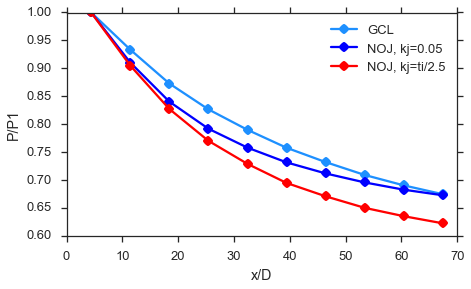

In [117]:
fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)
#ax.plot(x_g[0,0:10]/dt[0:10],np.mean(P,axis=0)/P_ref,'o-',color='dodgerblue',label='GCL')
#ax.plot(x_g[0,0:10]/dt[0:10],np.mean(P_noj,axis=0)/P_ref,'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],np.mean(P,axis=0)/P_ref,'o-',color='dodgerblue',label='GCL')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],np.mean(P_noj,axis=0)/P_ref,'o-b',label='NOJ, kj=0.05')
ax.plot(x_g[0,range(6,80,8)]/dt[range(6,80,8)],np.mean(P_noj_ti,axis=0)/P_ref,'o-r',label='NOJ, kj=ti/2.5')
ax.set_xlabel('x/D')
ax.set_ylabel('P/P1')
ax.legend(loc='upper right')

In [118]:
#x_fig = (HR1.pos[0,0:10]-HR1.pos[0,0:10].min())/(2*HR1.WT.R)
x_fig = (HR1.pos[0,range(6,80,8)]-HR1.pos[0,range(6,80,8)].min())/(2*HR1.WT.R)

In [119]:
x_fig2 = x_fig[1:10]
Y_gcl = np.array([P[:,i]/P[:,0] for i in range(1,10)]).T
Y_noj = np.array([P_noj[:,i]/P_noj[:,0] for i in range(1,10)]).T
Y_noj2 = np.array([P_noj_ti[:,i]/P_noj_ti[:,0] for i in range(1,10)]).T
Y_exp = np.array([(df_pows_filtered.iloc[:,i]/df_pows_filtered.iloc[:,0]).dropna() for i in range(1,10)]).T

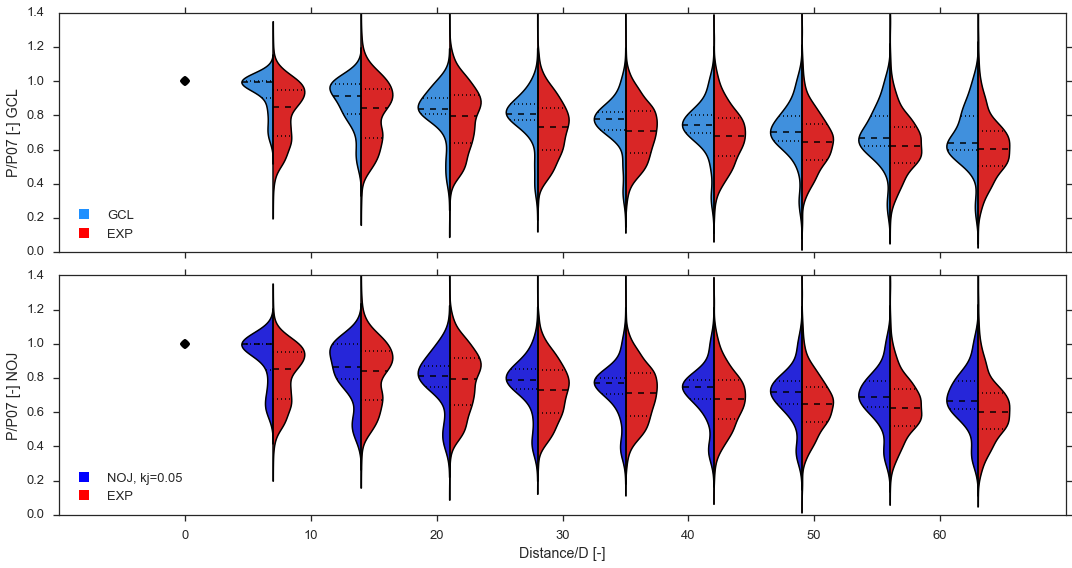

In [120]:
fig, [ax,ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches([15,8])
sns.violinplot(Y_gcl, positions=x_fig2, widths=5, 
               color="dodgerblue", ax=ax, half='left',inner_kws={'color':'black'})
sns.violinplot(Y_exp, positions=x_fig2, widths=5, 
               color="red", ax=ax, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')
ax.legend([a,b],['GCL', 'EXP'],loc='lower left')
ax.plot(0.,1.,'ok')

sns.violinplot(Y_noj, positions=x_fig2, widths=5, 
               color="blue", ax=ax2, half='left',inner_kws={'color':'black'})
#sns.violinplot(P_noj_kj_0p075/P_ref, positions=x_fig2, widths=5, 
#               color="green", alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
#sns.violinplot(P_noj_kj_0p09/P_ref, positions=x_fig2, widths=5, 
#               color='dodgerblue', alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
sns.violinplot(Y_exp, positions=x_fig2, widths=5, 
               color="red", ax=ax2, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='blue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='green')
c = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
d = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')

#ax2.legend([a,b,c,d],['NOJ, kj=0.05','NOJ, kj=0.075','NOJ, kj=0.09','EXP'],loc='lower left')
ax2.legend([a,d],['NOJ, kj=0.05','EXP'],loc='lower left')
ax2.plot(0.,1.,'ok')

ax.set_ylim([0,1.4])
ax2.set_ylim([0,1.4])
ax.set_xlim([-10,70])
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(range(0,70,10))
ax.set_ylabel('P/P07 [-] GCL')
ax2.set_ylabel('P/P07 [-] NOJ')
ax2.set_xlabel('Distance/D [-]')
fig.tight_layout()
#fig.savefig(Folder+'P_violin.pdf') 

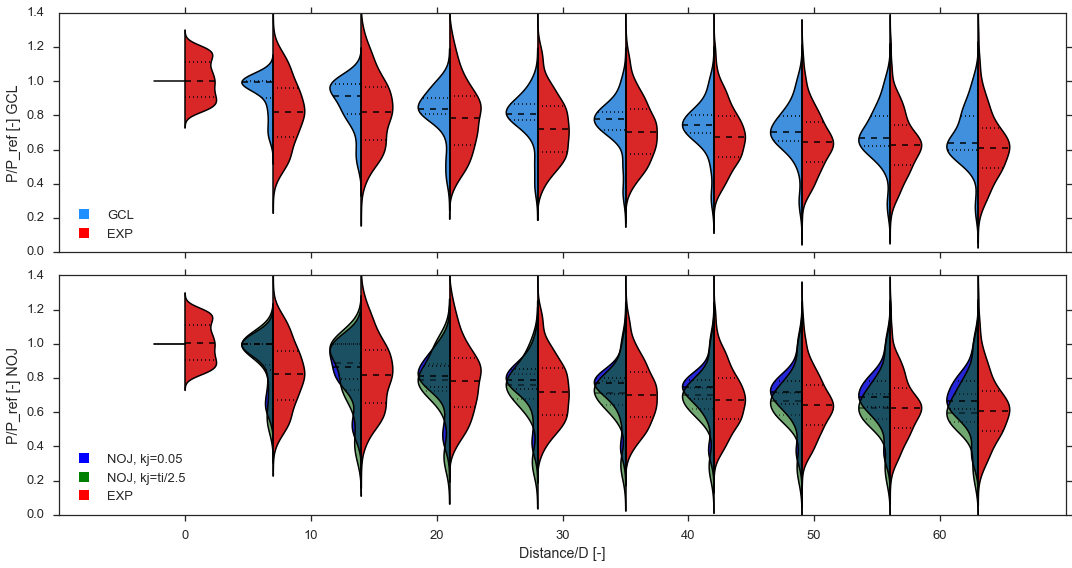

In [121]:
fig, [ax,ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches([15,8])
sns.violinplot(P/P_ref, positions=x_fig, widths=5, 
               color="dodgerblue", ax=ax, half='left',inner_kws={'color':'black'})
sns.violinplot(df_pows_filtered.iloc[:,:10].dropna()*1000./P_ref, positions=x_fig, widths=5, 
               color="red", ax=ax, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')
ax.legend([a,b],['GCL', 'EXP'],loc='lower left')

sns.violinplot(P_noj/P_ref, positions=x_fig, widths=5, 
               color="blue", ax=ax2, half='left',inner_kws={'color':'black'})
sns.violinplot(P_noj_ti/P_ref, positions=x_fig, widths=5, 
               color="green", alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
sns.violinplot(df_pows_filtered.iloc[:,:10].dropna()*1000./P_ref, positions=x_fig, widths=5, 
               color="red", ax=ax2, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='blue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='green')
c = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')
ax2.legend([a,b,c],['NOJ, kj=0.05','NOJ, kj=ti/2.5','EXP'],loc='lower left')
#ax2.legend([a,d],['NOJ, kj=0.05','EXP'],loc='lower left')

ax.set_ylim([0,1.4])
ax2.set_ylim([0,1.4])
ax.set_xlim([-10,70])
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(range(0,70,10))
ax.set_ylabel('P/P_ref [-] GCL')
ax2.set_ylabel('P/P_ref [-] NOJ')
ax2.set_xlabel('Distance/D [-]')
fig.tight_layout()
fig.savefig(Folder+'P_violin.pdf') 

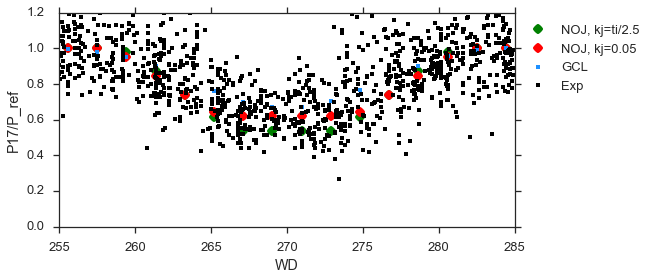

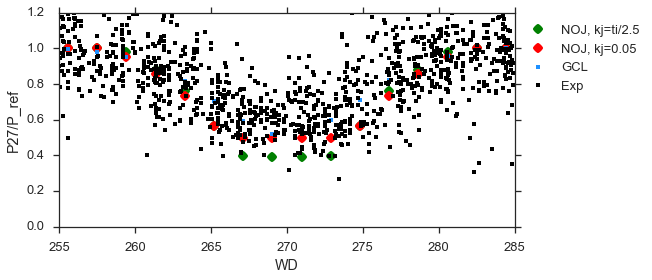

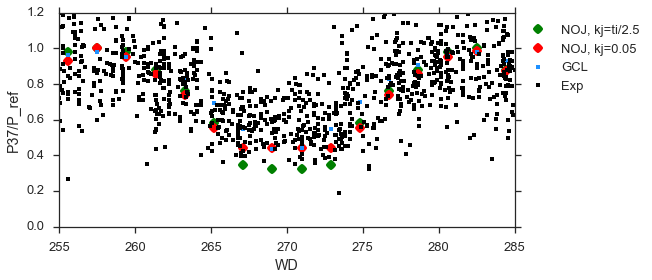

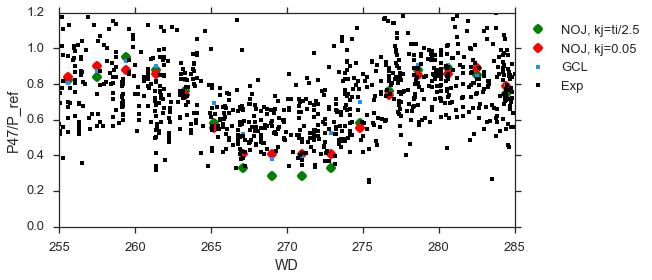

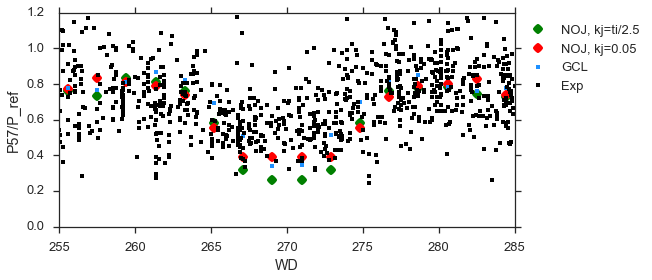

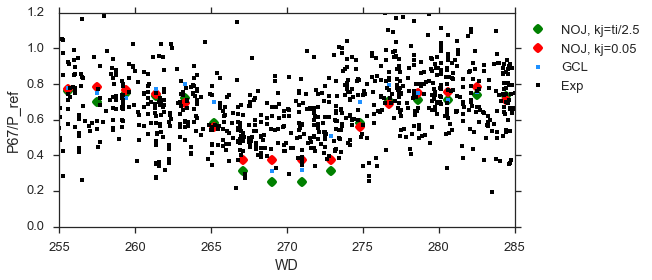

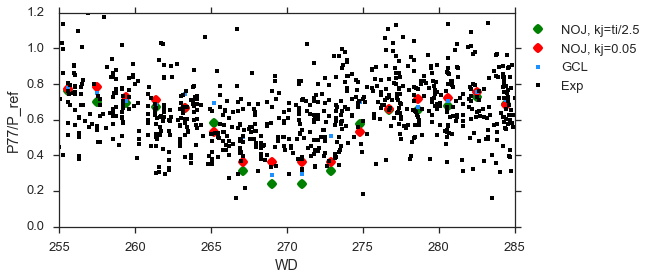

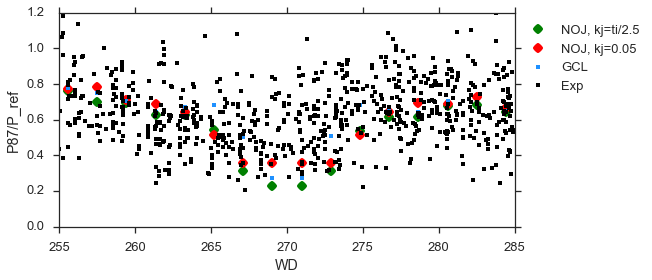

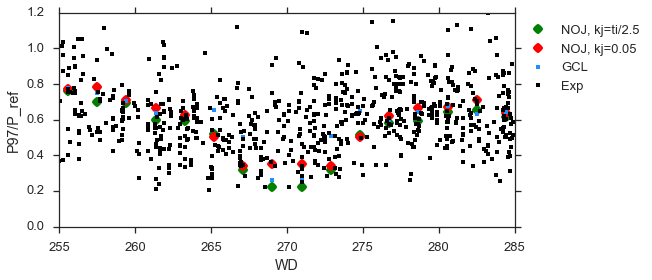

In [122]:
for i in range(1,10):
    fig = plt.figure(figsize=[7.5,4])
    ax = fig.add_subplot(111)
    ax.plot(WD,P_noj_ti[:,i]/P_ref,'og',label='NOJ, kj=ti/2.5')
    ax.plot(WD,P_noj[:,i]/P_ref,'or',label='NOJ, kj=0.05')
    ax.plot(WD,P[:,i]/P_ref,'.',color='dodgerblue',label='GCL')#,alpha=0.4)
    ax.plot(df_pows_filtered.np07_corr,df_pows_filtered.iloc[:,i]*1000./P_ref,'.k',label='Exp')
    ax.set_xlabel('WD')
    ax.set_ylabel('P'+str(i)+'7/P_ref')
    ax.set_ylim([0.,1.2])
    ax.set_xlim([270.-WD_window,270.+WD_window])
    lgd=ax.legend(bbox_to_anchor=(1.3, 1.))#loc='lower left')
    fig.tight_layout()
    fig.savefig(Folder+'P'+str(i)+'.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight') 

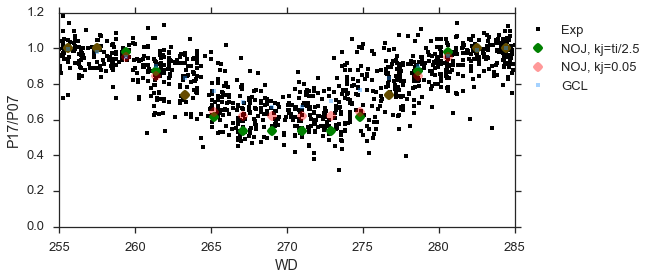

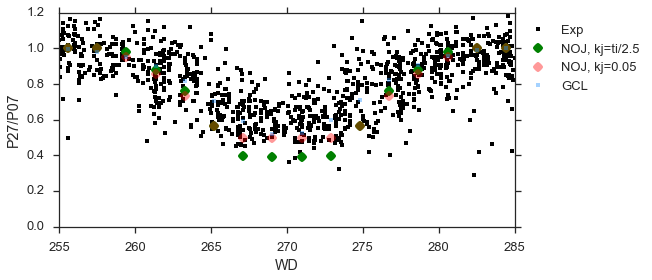

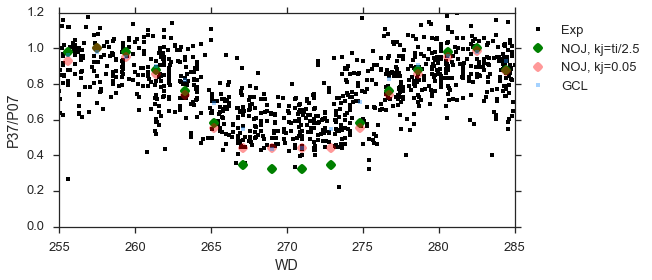

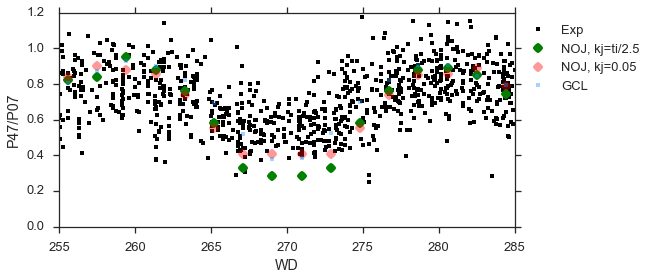

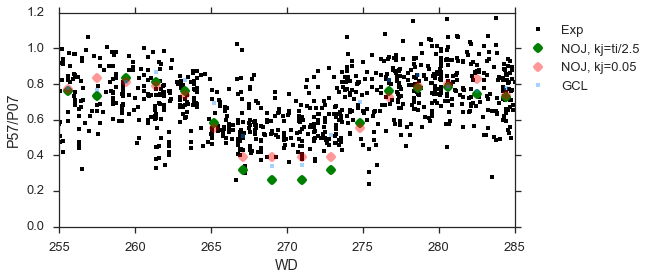

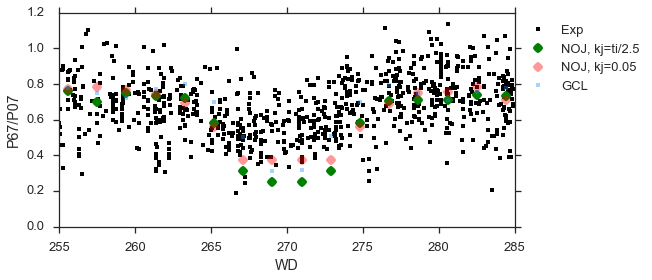

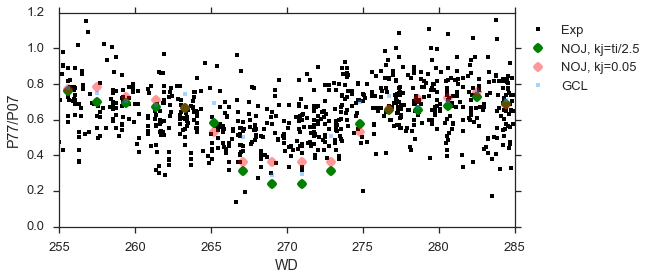

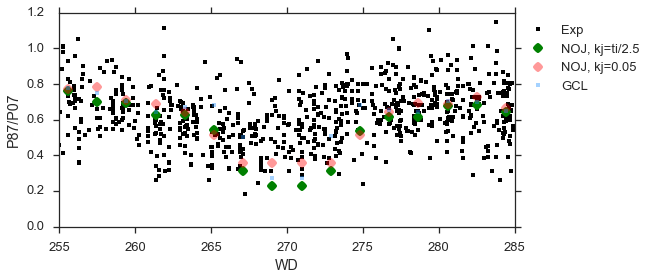

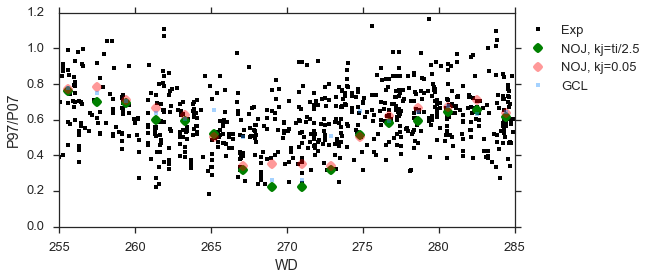

In [123]:
for i in range(1,10):
    fig = plt.figure(figsize=[7.5,4])
    ax = fig.add_subplot(111)
    ax.plot(df_pows_filtered.np07_corr,df_pows_filtered.iloc[:,i]/df_pows_filtered.iloc[:,0],'.k',label='Exp')     
    ax.plot(WD,P_noj_ti[:,i]/P_noj_ti[:,0],'og',label='NOJ, kj=ti/2.5')    
    ax.plot(WD,P_noj[:,i]/P_noj[:,0],'or',label='NOJ, kj=0.05',alpha=0.4)
    ax.plot(WD,P[:,i]/P[:,0],'.',color='dodgerblue',label='GCL',alpha=0.4)   
    ax.set_xlabel('WD')
    ax.set_ylabel('P'+str(i)+'7/P07')
    ax.set_ylim([0.,1.2])
    ax.set_xlim([270.-WD_window,270.+WD_window])    
    lgd=ax.legend(bbox_to_anchor=(1.3, 1.))#loc='lower left')
    fig.tight_layout()
#    fig.savefig(Folder+'P'+str(i)+'.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight') 

In [156]:
# Standard normal distribution functions
phi = sp.stats.distributions.norm().pdf
PHI = sp.stats.distributions.norm().cdf
PHIinv = sp.stats.distributions.norm().ppf

# Instanciate and fit Gaussian Process Model
ones_ = np.ones(1)#2)
theta0=1e1*ones_
thetaL=1e0*ones_ 
thetaU=1e6*ones_
nugget=1e-12

# Input variables
if U_TI:
    X = np.vstack([WD,TI]).T
else:
    X = np.vstack([WD]).T

In [157]:
# Output variables
#Y = Y_gcl
Y = P
gp_gcl = GaussianProcess(theta0=theta0,thetaL=thetaL, thetaU=thetaU,nugget=nugget)
gp_gcl.fit(X, Y)
                
# Output variables
#Y = Y_noj
Y = P_noj_ti
gp_noj = GaussianProcess(theta0=theta0,thetaL=thetaL, thetaU=thetaU,nugget=nugget)
gp_noj.fit(X, Y)


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x109597c80>, normalize=True,
        nugget=array(1e-12), optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x1069429d0>,
        regr=<function constant at 0x1095978c0>, storage_mode='full',
        theta0=array([[ 10.]]), thetaL=array([[ 1.]]),
        thetaU=array([[ 1000000.]]), verbose=False)

In [158]:
# Saving the objects:
with open('wake_gp.pickle', 'w') as f:
    pickle.dump([gp_gcl, gp_noj], f)

# Getting back the objects:
#with open('wake_gp.pickle') as f:
#    gp_gcl, gp_noj = pickle.load(f)

In [159]:
WS_pred,WD_pred = np.meshgrid(np.arange(7.5,8.5+.05,.05),np.arange(270.-2*WD_window,270.+2*WD_window+WD_window/50.,WD_window/50.))

if U_TI:
    TI_pred = np.linspace(0.03, 0.20, 5) 
    #TI_pred = sp.stats.lognorm.rvs(0.411077780238, 0.0419242684341, 0.0402365281681, size=20.) 
    Foldername='Figures/'+str(WD_window)+'/TI'
    WS_pred,__ = np.meshgrid(WS_pred,TI_pred)
    WD_pred,TI_pred = np.meshgrid(WD_pred,TI_pred)
    shape_gp = np.shape(WS_pred)
    WS_pred = WS_pred.flatten()
    WD_pred = WD_pred.flatten()
    TI_pred = TI_pred.flatten()
    X_pred = np.vstack([WS_pred,WD_pred,TI_pred]).T
else:
    TI_pred = TI_mean*np.ones_like(WS_pred)
    Foldername='Figures/'+str(WD_window)+'/NoTI'
    shape_gp = np.shape(WS_pred)
    WS_pred = WS_pred.flatten()
    WD_pred = WD_pred.flatten()
    TI_pred = TI_pred.flatten()
    X_pred = np.vstack([WD_pred]).T
    
y_gcl_pred, MSE = gp_gcl.predict(X_pred, eval_MSE=True)
sigma_gcl = np.sqrt(MSE)

y_noj_pred, MSE = gp_noj.predict(X_pred, eval_MSE=True)
sigma_noj = np.sqrt(MSE)

___python'''
i = 8
fig, [ax,ax2] = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.set_size_inches([15,8])
CS=ax2.contourf(WS_pred.reshape(shape_gp),WD_pred.reshape(shape_gp),(y_pred[:,i]).reshape(shape_gp),cmap='Blues')
ax.contourf(WS.reshape(shape_eval),WD.reshape(shape_eval),(Y_gcl[:,i]).reshape(shape_eval),
            cmap='Blues',levels=CS.levels)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('P'+str(i)+'7/P07')
plt.tight_layout
'''

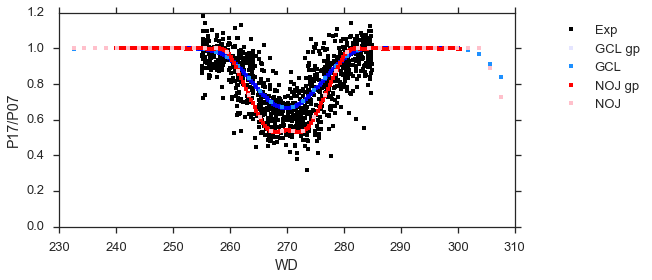

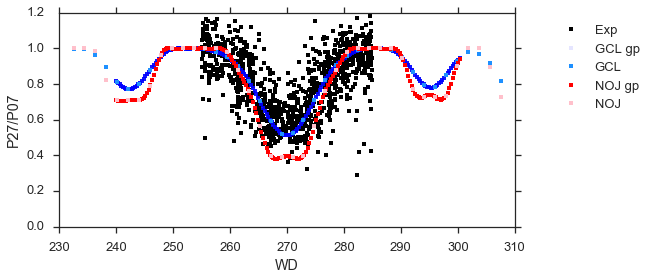

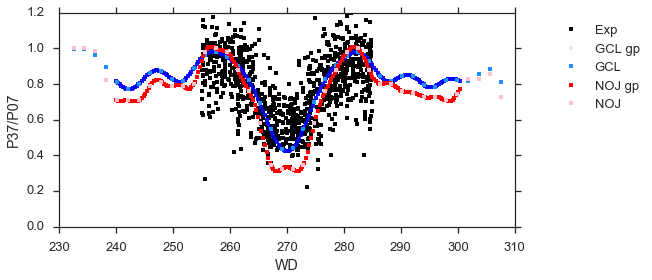

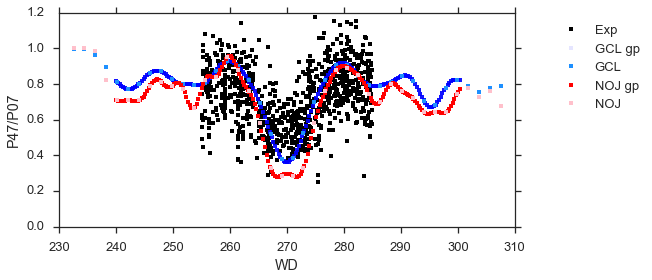

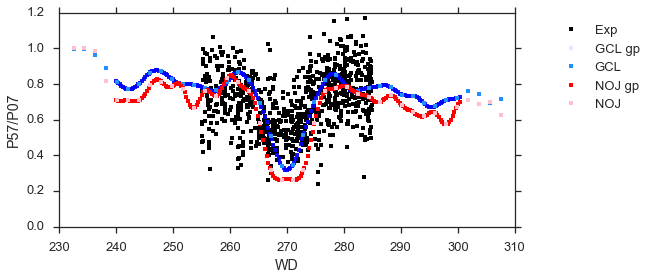

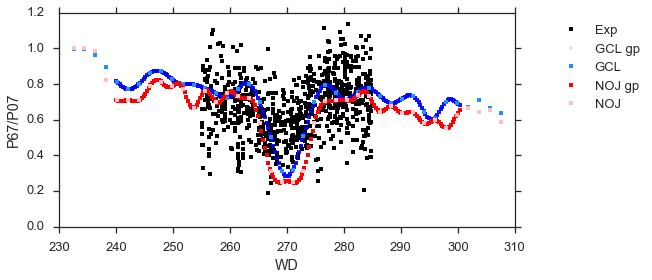

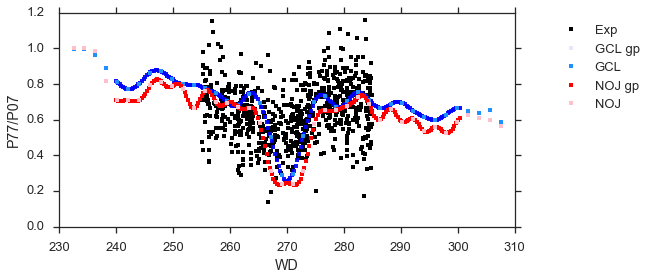

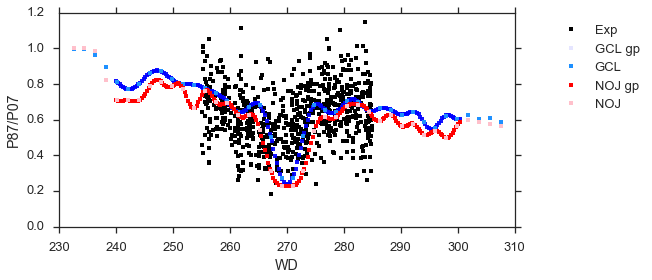

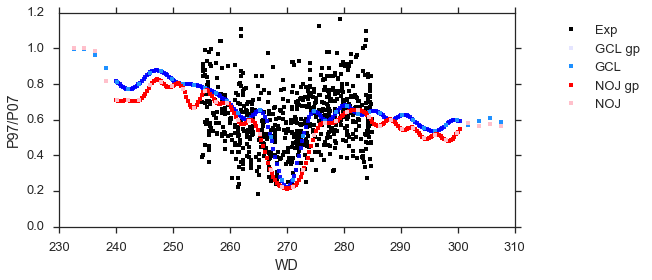

In [160]:
for i in range(1,10):
    fig = plt.figure(figsize=[7.5,4])
    ax = fig.add_subplot(111)
    ax.plot(df_pows_filtered.np07_corr,df_pows_filtered.iloc[:,i]/df_pows_filtered.iloc[:,0],'.k',label='Exp')
    ax.plot(WD_pred,y_gcl_pred[:,i]/y_gcl_pred[:,0],'.',color='blue',label='GCL gp',alpha=0.1)      
    ax.plot(WD,Y_gcl[:,i-1],'.',color='dodgerblue',label='GCL')#,alpha=0.4)  
    ax.plot(WD_pred,y_noj_pred[:,i]/y_noj_pred[:,0],'.',color='red',label='NOJ gp')      
    ax.plot(WD,Y_noj2[:,i-1],'.',color='pink',label='NOJ')#,alpha=0.4)      
#    plt.fill(np.concatenate([WD_pred, WD_pred[::-1]]),
#        np.concatenate([(y_gcl_pred[:,i] - 1.9600 * sigma_gcl[i])/y_gcl_pred[:,0],
#                        ((y_gcl_pred[:,i] + 1.9600 * sigma_gcl[i])/y_gcl_pred[:,0])[::-1]]),
#        alpha=1.0, fc='r', ec='None', label='95% confidence interval')     
    ax.set_xlabel('WD')
    ax.set_ylabel('P'+str(i)+'7/P07')
    ax.set_ylim([0.,1.2])
    lgd=ax.legend(bbox_to_anchor=(1.3, 1.))#loc='lower left')
    fig.tight_layout()
    #fig.savefig(Folder+'P'+str(i)+'.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight') 

## Full monte Carlo
### Multiple flow cases and different local wind direction 

In [161]:
Folder=Foldername+'/FlowSector_SpatialCorrelation/'

In [162]:
df_nps = pd.DataFrame.from_csv('df_nps.csv')
df_nps_filtered = df_nps.ix[df_pows_filtered.index.values]
df_nps_filtered['np07_corr'] = df_pows_filtered.np07_corr
np_dif = (np.mod(df_nps_filtered-df_nps_filtered.dropna().np07_corr+180.,360.)-180.).iloc[:,:-1][range(6,80,8)+range(5,71,8)+range(7,73,8)]
np_dif=np_dif[abs(np_dif)<50].dropna()
np_dif.head(10)

mean_np_dif = np_dif.apply(sp.stats.circmean,low=-180.,high=180.)
np_dif = np.mod(np_dif-mean_np_dif+180.,360.)-180.

mean_np_dif = np_dif.apply(sp.stats.circmean,low=-180.,high=180.)

std_np_dif = np_dif.apply(sp.stats.circstd,low=-180.,high=180.)
corre_np_dif = np_dif.corr()
cov_np_dif = np_dif.cov()

### Large Scale Eddies (Trends in the Reynolds averaging time and time delay due to advection of wakes)

In [163]:
T_Re = 10.*60.
Std_LSE = 2.3
sigma_LSE = Std_LSE * ((x_g[6,range(6,80,8)]**2.0 + y_g[6,range(6,80,8)]**2.0)**0.5)/(np.mean(WS)*T_Re)
Mat_LSE = np.diag(sigma_LSE)

In [164]:
sigma_LSE

array([ 0.        ,  0.2688125 ,  0.53714583,  0.80595833,  1.07429167,
        1.342625  ,  1.6114375 ,  1.87977083,  2.14858333,  2.41691667])

In [167]:
def Gaussian_Average_wake(gp,WS,WD,sigma_LSE,NG_P):
    xi, wi = np.polynomial.hermite.hermgauss(NG_P)
    
    nC = len(WS) #nC cases
    nT = len(sigma_LSE) #nT turbines
    
    meanP_WT = np.zeros([nC,nT])
    meanU_WT = np.zeros([nC,nT])
    meanCT_WT = np.zeros([nC,nT])
    for i in range(NG_P):
        for iT in range(nT):
            y_aux = gp.predict(np.vstack([WD+np.sqrt(2.)*sigma_LSE[iT]*xi[i]]).T)
            meanP_WT[:,iT] += wi[i]*y_aux[:,iT]*(1./np.sqrt(np.pi))
    return meanP_WT

In [168]:
P_GA = Gaussian_Average_wake(gp_gcl,WS,WD,sigma_LSE,NG_P=5)
P_GA_noj = Gaussian_Average_wake(gp_noj,WS,WD,sigma_LSE,NG_P=5)

### Spatial decorrelation

In [169]:
#sigma_D = 4.2e-4*(x_g[0,0:10]**2.0 + y_g[0,0:10]**2.0)**0.5  
sigma_D = 4.2e-4*(x_g[6,range(6,80,8)]**2.0 + y_g[6,range(6,80,8)]**2.0)**0.5 
Mat_sigm = np.diag(sigma_D) 

In [170]:
N_sim = 5000
wd_MC = np.random.multivariate_normal(mean=0.0*mean_np_dif.values[:10], 
                                      cov=Mat_sigm*corre_np_dif.values[:10,:10]*Mat_sigm.T, size=N_sim)
WD = np.random.uniform(270.-WD_window,270.+WD_window,size=N_sim)
#+np.random.normal(270.0,3.3, size=N_sim)
WS = np.random.uniform(7.5,8.5,size=N_sim)
if U_TI:
    TI = sp.stats.lognorm.rvs(0.411077780238, 0.0419242684341, 0.0402365281681, size=len(WS)) 
else:
    TI = TI_mean*np.ones_like(WS)

In [171]:
WD_MC = wd_MC+np.atleast_2d(WD).T*np.ones([1,10])

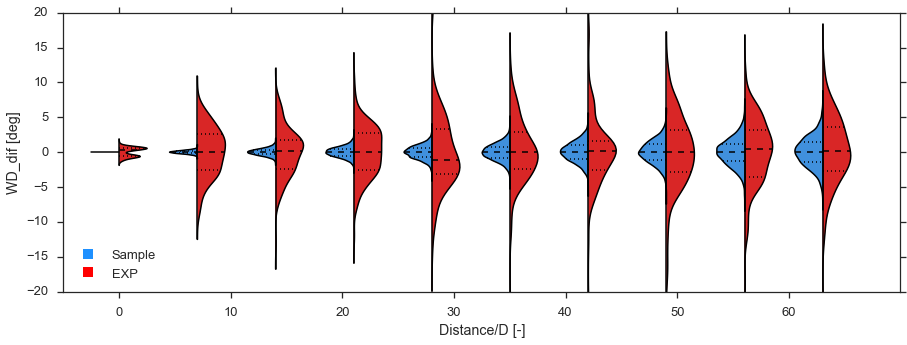

In [172]:
fig, ax = plt.subplots()
fig.set_size_inches([15,5])
colormap = plt.cm.Blues
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.85, N_sim)])
sns.violinplot(np_dif.iloc[:,0:10], positions=x_fig, widths=5, 
               color="red", ax=ax, half='right',inner_kws={'color':'black'})
sns.violinplot(wd_MC[:,0:10], positions=x_fig, widths=5, 
               color="dodgerblue", ax=ax, half='left',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')
ax.legend([a,b],['Sample', 'EXP'],loc='lower left')
ax.set_xlim([-5,70])
ax.set_ylim([-20,20])
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(range(0,70,10))
ax.set_xlabel('Distance/D [-]')
ax.set_ylabel('WD_dif [deg]')
fig.savefig(Folder+'WD_violin.pdf') 
print

In [174]:
def GA_post_process_wake(gp,WS,WD_T,TI,sigma_LSE,NG_P):
    xi, wi = np.polynomial.hermite.hermgauss(NG_P)
    
    nC = len(WS) #nC cases
    nT = len(sigma_LSE) #nT turbines
    
    meanP_WT = np.zeros([nC,nT])
    meanU_WT = np.zeros([nC,nT])
    meanCT_WT = np.zeros([nC,nT])
    for i in range(NG_P):
        for iT in range(nT):
            y_aux = gp.predict(np.vstack([WD_T[:,iT]+np.sqrt(2.)*sigma_LSE[iT]*xi[i]]).T)
            meanP_WT[:,iT] += wi[i]*y_aux[:,iT]*(1./np.sqrt(np.pi))
    return meanP_WT

In [175]:
def post_process_wake(gp,WS,WD_T,TI):
    nC,nT = np.shape(WD_T) #nC cases, nT turbines
    y_out = np.zeros([nC,nT])
    for iT in range(nT):
        #y_aux = gp.predict(np.vstack([WS,WD_T[:,iT],TI]).T)
        y_aux = gp.predict(np.vstack([WD_T[:,iT]]).T)
        y_out[:,iT] = y_aux[:,iT]
    return y_out

In [188]:
P_gcl_gp = post_process_wake(gp=gp_gcl,WS=WS,WD_T=WD_MC[:,0:10],TI=TI)
P_noj_gp = post_process_wake(gp=gp_noj,WS=WS,WD_T=WD_MC[:,0:10],TI=TI)

In [189]:
Y_gcl_gp = np.array([P_gcl_gp[:,i]/P_gcl_gp[:,0] for i in range(1,10)]).T
Y_noj_gp = np.array([P_noj_gp[:,i]/P_noj_gp[:,0] for i in range(1,10)]).T

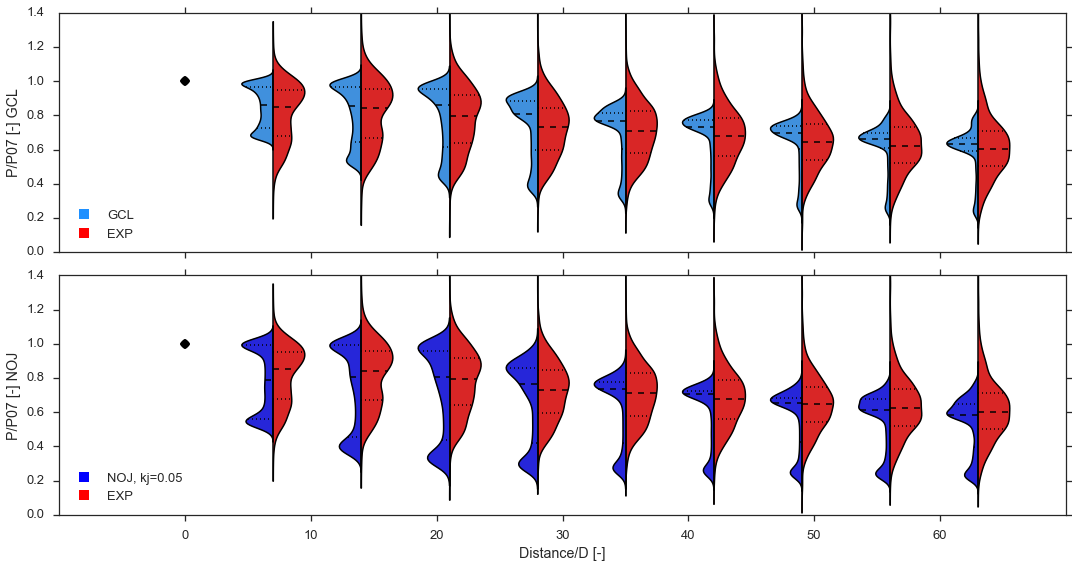

In [191]:
fig, [ax,ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches([15,8])
sns.violinplot(Y_gcl_gp, positions=x_fig2, widths=5,
               color="dodgerblue", ax=ax, half='left',inner_kws={'color':'black'})
sns.violinplot(Y_exp, positions=x_fig2, widths=5, 
               color="red", ax=ax, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')
ax.legend([a,b],['GCL', 'EXP'],loc='lower left')
ax.plot(0.,1.,'ok')

sns.violinplot(Y_noj_gp, positions=x_fig2, widths=5, 
               color="blue", ax=ax2, half='left',inner_kws={'color':'black'})
#sns.violinplot(P_noj_kj_0p075/P_ref, positions=x_fig2, widths=5, 
#               color="green", alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
#sns.violinplot(P_noj_kj_0p09/P_ref, positions=x_fig2, widths=5, 
#               color='dodgerblue', alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
sns.violinplot(Y_exp, positions=x_fig2, widths=5, 
               color="red", ax=ax2, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='blue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='green')
c = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
d = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')

#ax2.legend([a,b,c,d],['NOJ, kj=0.05','NOJ, kj=0.075','NOJ, kj=0.09','EXP'],loc='lower left')
ax2.legend([a,d],['NOJ, kj=0.05','EXP'],loc='lower left')
ax2.plot(0.,1.,'ok')

ax.set_ylim([0,1.4])
ax2.set_ylim([0,1.4])
ax.set_xlim([-10,70])
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(range(0,70,10))
ax.set_ylabel('P/P07 [-] GCL')
ax2.set_ylabel('P/P07 [-] NOJ')
ax2.set_xlabel('Distance/D [-]')
fig.tight_layout()
fig.savefig(Folder+'P_violin.pdf') 

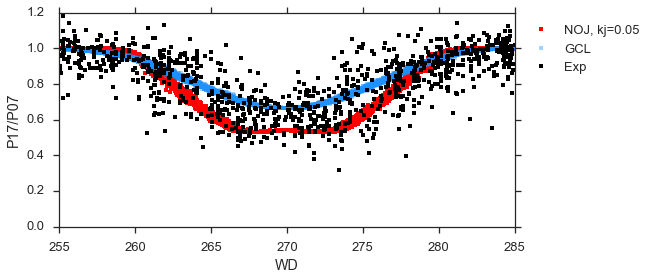

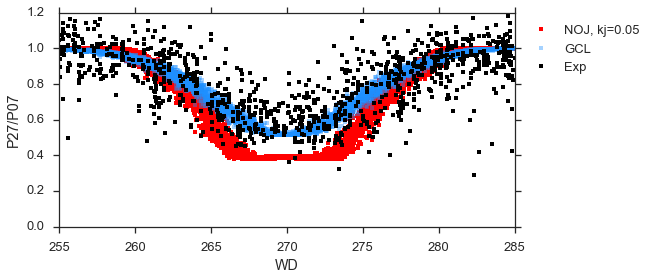

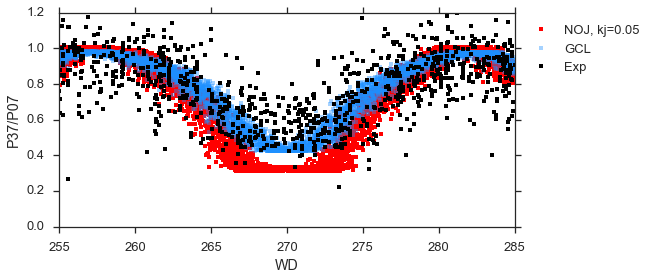

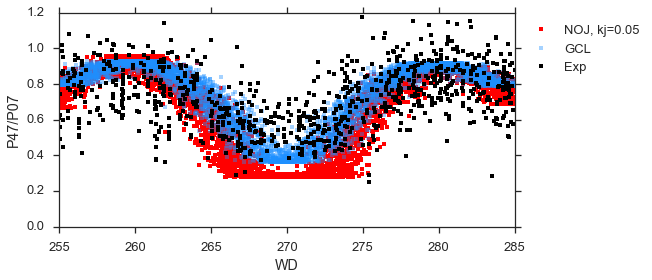

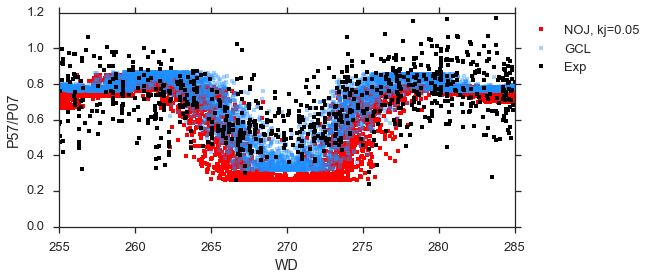

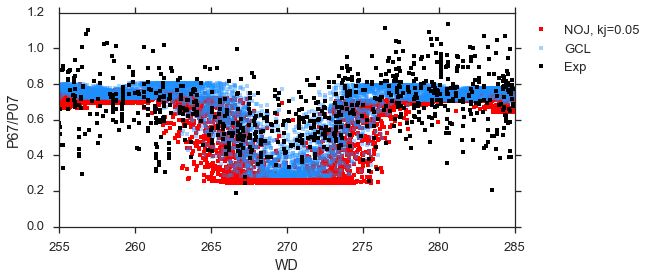

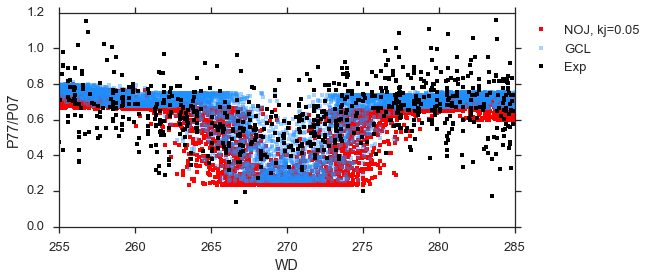

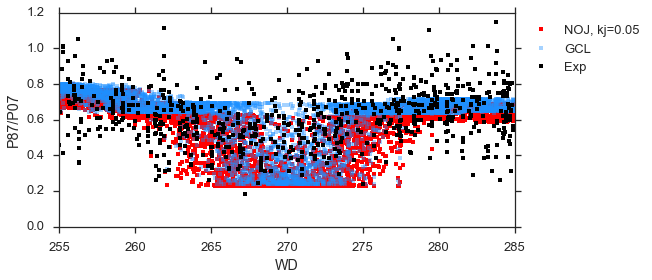

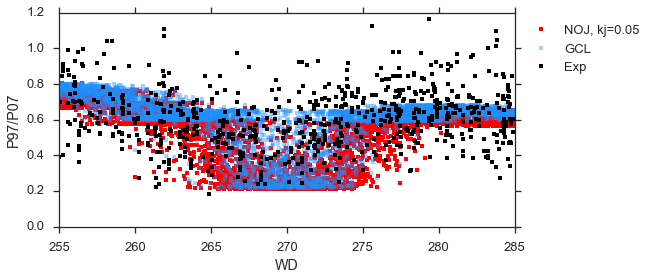

In [179]:
for i in range(1,10):
    fig = plt.figure(figsize=[7.5,4])
    ax = fig.add_subplot(111)
    ax.plot(WD,Y_noj_gp[:,i-1],'.r',label='NOJ, kj=0.05')#,alpha=0.4)
    ax.plot(WD,Y_gcl_gp[:,i-1],'.',color='dodgerblue',label='GCL',alpha=0.4)
    ax.plot(df_pows_filtered.np07_corr,df_pows_filtered.iloc[:,i]/df_pows_filtered.iloc[:,0],'.k',label='Exp')    
    ax.set_xlabel('WD')
    ax.set_ylabel('P'+str(i)+'7/P07')
    ax.set_ylim([0.,1.2])
    lgd=ax.legend(bbox_to_anchor=(1.3, 1.))#loc='lower left')
    fig.tight_layout()
    fig.savefig(Folder+'P'+str(i)+'.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight') 

### Gaussian average for trend and full MC for spatial decorrelation

In [192]:
Folder=Foldername+'/FlowSector_GaussianAverage/'

In [193]:
P_gcl_gp = GA_post_process_wake(gp_gcl,WS,WD_MC,TI,sigma_LSE,NG_P=4)
P_noj_gp = GA_post_process_wake(gp_noj,WS,WD_MC,TI,sigma_LSE,NG_P=4)

In [194]:
Y_gcl_gp = np.array([P_gcl_gp[:,i]/P_gcl_gp[:,0] for i in range(1,10)]).T
Y_noj_gp = np.array([P_noj_gp[:,i]/P_noj_gp[:,0] for i in range(1,10)]).T

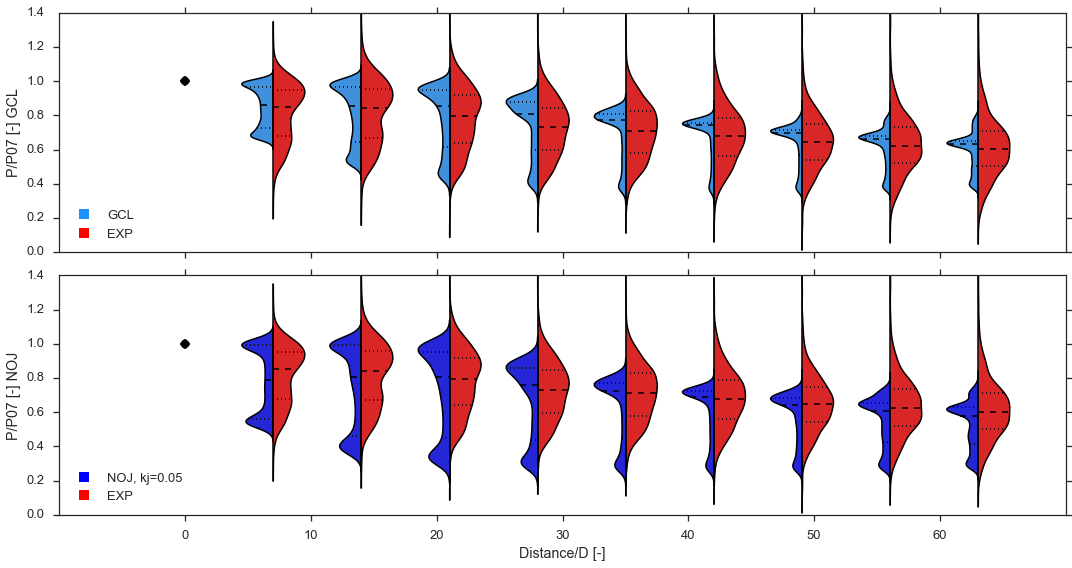

In [195]:
fig, [ax,ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches([15,8])
sns.violinplot(Y_gcl_gp, positions=x_fig2, widths=5,
               color="dodgerblue", ax=ax, half='left',inner_kws={'color':'black'})
sns.violinplot(Y_exp, positions=x_fig2, widths=5, 
               color="red", ax=ax, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')
ax.legend([a,b],['GCL', 'EXP'],loc='lower left')
ax.plot(0.,1.,'ok')

sns.violinplot(Y_noj_gp, positions=x_fig2, widths=5, 
               color="blue", ax=ax2, half='left',inner_kws={'color':'black'})
#sns.violinplot(P_noj_kj_0p075/P_ref, positions=x_fig2, widths=5, 
#               color="green", alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
#sns.violinplot(P_noj_kj_0p09/P_ref, positions=x_fig2, widths=5, 
#               color='dodgerblue', alpha=0.6, ax=ax2, half='left',inner_kws={'color':'black'})
sns.violinplot(Y_exp, positions=x_fig2, widths=5, 
               color="red", ax=ax2, half='right',inner_kws={'color':'black'})
#Create custom legend
a = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='blue')
b = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='green')
c = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='dodgerblue')
d = plt.Line2D((0,-1),(0,0), marker='s', linestyle='',color='red')

#ax2.legend([a,b,c,d],['NOJ, kj=0.05','NOJ, kj=0.075','NOJ, kj=0.09','EXP'],loc='lower left')
ax2.legend([a,d],['NOJ, kj=0.05','EXP'],loc='lower left')
ax2.plot(0.,1.,'ok')

ax.set_ylim([0,1.4])
ax2.set_ylim([0,1.4])
ax.set_xlim([-10,70])
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(range(0,70,10))
ax.set_ylabel('P/P07 [-] GCL')
ax2.set_ylabel('P/P07 [-] NOJ')
ax2.set_xlabel('Distance/D [-]')
fig.tight_layout()
fig.savefig(Folder+'P_violin.pdf') 

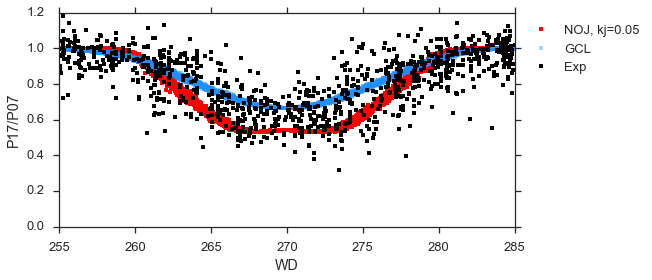

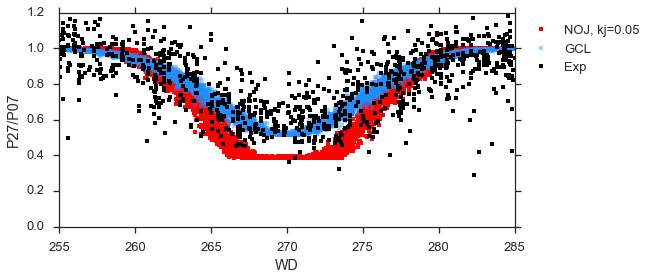

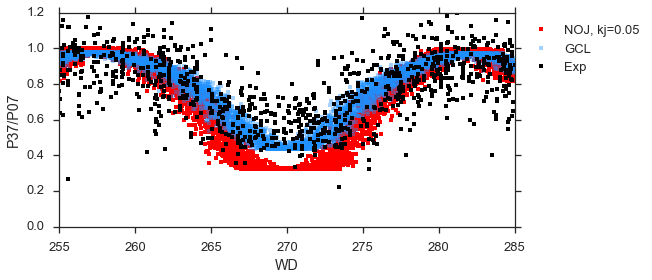

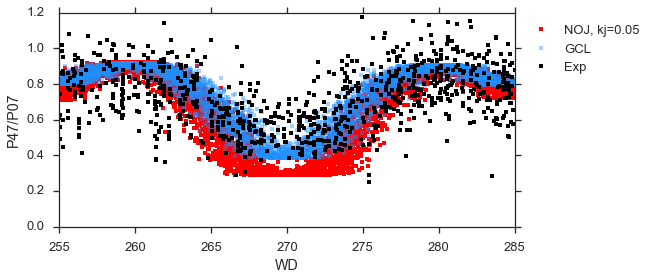

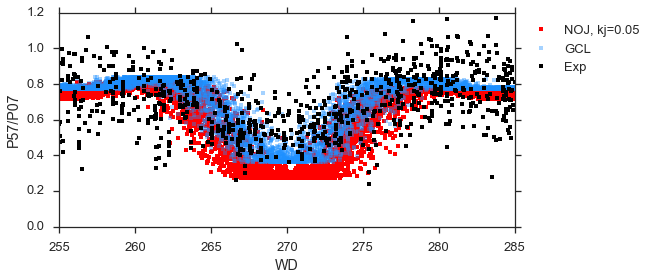

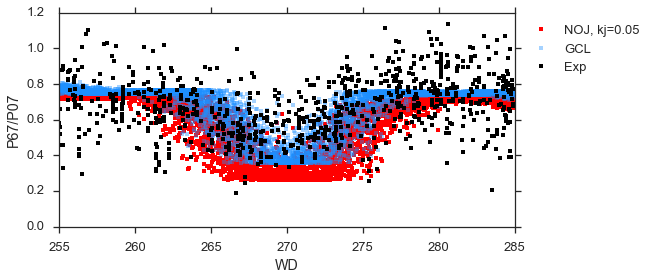

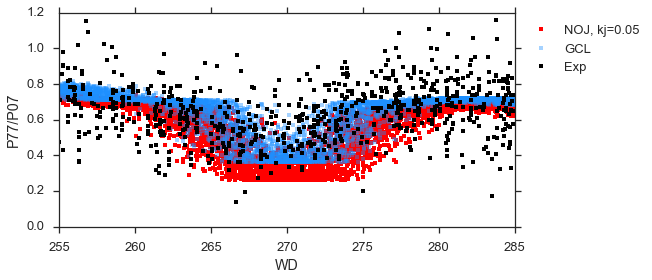

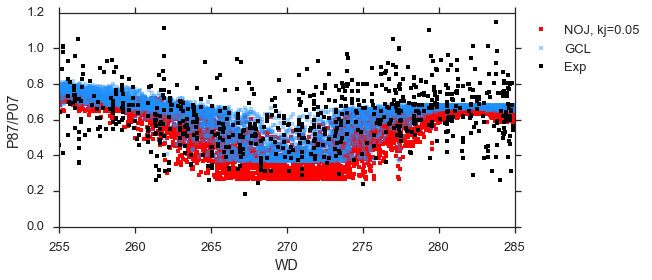

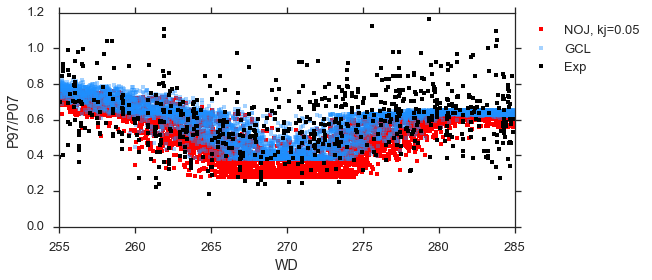

In [196]:
for i in range(1,10):
    fig = plt.figure(figsize=[7.5,4])
    ax = fig.add_subplot(111)
    ax.plot(WD,Y_noj_gp[:,i-1],'.r',label='NOJ, kj=0.05')#,alpha=0.4)
    ax.plot(WD,Y_gcl_gp[:,i-1],'.',color='dodgerblue',label='GCL',alpha=0.4)
    ax.plot(df_pows_filtered.np07_corr,df_pows_filtered.iloc[:,i]/df_pows_filtered.iloc[:,0],'.k',label='Exp')    
    ax.set_xlabel('WD')
    ax.set_ylabel('P'+str(i)+'7/P07')
    ax.set_ylim([0.,1.2])
    lgd=ax.legend(bbox_to_anchor=(1.3, 1.))#loc='lower left')
    fig.tight_layout()
    fig.savefig(Folder+'P'+str(i)+'.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight') 